## Lab calorimetria
$\Delta Q = C\, m\, (T_1  - T_2)$,     $\Delta Q_2 = C_2\, m_2\, (T_f  - T_2)$.  
$C\, m\, (T_1  - T_f) = C_2\, m_2\, (T_f  - T_2) \equiv C\, m\, T_1 + C_2\, m_2\, T_2 = C_2\, m_2\, T_f + C\, m\,  T_f \implies T_f  = \frac{C\, m\, T_1 + C_2\, m_2\, T_2}{
C m +C_2  m_2 }$

$C_1 = C_2  \frac{m_2 + m_{equiv}}{m_1} \frac{T_f  - T_2}{T_1  - T_f}$   
($C_2 = 4.186~kJkg^{-1}\,ºC^{-1}$)

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# String descritivo das unidates do Cesp
UNITCesp = 'kJ kg\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}ºC\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}'
plt.close("all")

In [52]:
# @title Valores Tabelados de Calores Específicos *mássicos*
CespDf = pd.DataFrame({
    "Material": ["Água", "Cobre", "Chumbo" ,  "Vidro",  "Alumínio"],
    f'C / {UNITCesp}': [4.186, 0.385, 0.1295, 0.746, 0.9]
})
CespDf.style \
  .format(precision=3, thousands=".", decimal=",") \
  .format_index(str.upper, axis=1) \
  .relabel_index(["H2O", "Cu", "Pb", "Vd", "Al"], axis=0)

,MATERIAL,C / KJ KG⁻¹ºC⁻¹
H2O,Água,"4,186"
Cu,Cobre,"0,385"
Pb,Chumbo,"0,130"
Vd,Vidro,"0,746"
Al,Alumínio,"0,900"


In [53]:
# Função de Cálculo do Calor Específico
def Cesp(C2, m1, m2, meq, T1, T2, Tf):
  return C2 * (m2 + meq) / m1 * (Tf-T2) / (T1 - Tf)

C2 = CespDf.iloc[0, 1]
m1=0.1; m2=0.2; meq=0.024; T1=100; T2=23; Tf = 26.4
c1=Cesp(C2, m1, m2, meq, T1, T2, Tf)
mat = CespDf.iloc[1, 0]
print(f'Calor específico de {mat} é {c1:.3} {UNITCesp}')

Calor específico de Cobre é 0.433 kJ kg⁻¹ºC⁻¹


In [54]:
# Função de Temperatura de equilíbrio
def Tequil(C1, C2, m1, m2, T1, T2):
   return (C1 * m1 * T1 + C2 * m2 * T2 ) / ( C1 * m1 + C2 * m2)


In [55]:
# @title Previsão da Temperatura de equilíbrio
m1 = 0.050 # @param {type:"number"}
T1 = 98.5 # @param {type:"number"}
m2 = 0.200 # @param {type:"number"}
T2 = 23.5# @param {type:"number"}

C2 = CespDf.iloc[0, 1]

matIdx = 1 # @param {type:"slider", min:1, max:4, step:1}
matName = CespDf.iloc[matIdx, 0]
C1= CespDf.iloc[matIdx, 1]
Tf = Tequil(C1, C2, m1, m2, T1, T2)
print(f'Temperatura de equilíbrio de {matName} (C= {C1:.3}) {UNITCesp} é {Tf:.2f} ')


Temperatura de equilíbrio de Cobre (C= 0.385) kJ kg⁻¹ºC⁻¹ é 25.19 


In [56]:
# @title Valores Experimentais e Cálculo
m1 = 0.063 # @param {type:"number"}
T1 = 98.5 # @param {type:"number"}
m2 = 0.200 # @param {type:"number"}
T2 = 23.5# @param {type:"number"}
Tf = 27.08 # @param {type:"number"}
matIdx = 3 # @param {type:"slider", min:1, max:4, step:1}
matName = CespDf.iloc[matIdx, 0]
print(f'Metal: {matName}')
mequiv = 0.024 #
C2 = CespDf.iloc[0, 1]
Cx=Cesp(C2, m1, m2, meq, T1, T2, Tf)
# mat = CespDf.iloc[1, 0]
print(f'Calor específico de {matName} é {Cx:.3f} {UNITCesp}')


Metal: Vidro
Calor específico de Vidro é 0.746 kJ kg⁻¹ºC⁻¹


Text(0.5, 1.0, 'Evolução Temperatura')

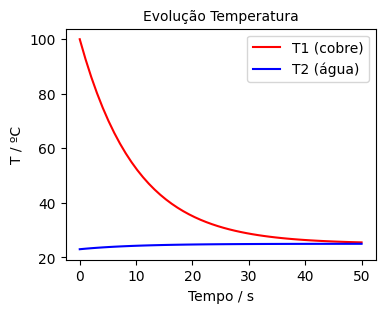

In [57]:
def Temp(t, Ti, Tf, tau):
  return Tf + (Ti-Tf) * np.exp(-t/tau)

x = np.linspace(0,50, 50)
T1 = 100; Tf = 25; T2 = 23;
y1 = Temp(x, T1, Tf, 10)
y2 = Temp(x, T2, Tf, 10)

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, y1, '-', color='red', label='T1 (cobre)')
plt.plot(x, y2, '-', color='blue', label='T2 (água)')
plt.legend(loc='best')
plt.xlabel('Tempo / s')
plt.ylabel('T / ºC')
plt.title("Evolução Temperatura", fontsize=10)

In [58]:
#!ls "/content/drive/MyDrive/Colab Notebooks/data-files/Calor-resultados.xlsx"



In [59]:
# Aceder a ficheiros na Google Drive
# https://colab.research.google.com/notebooks/io.ipynb
#from google.colab import drive
#drive.mount('/content/drive')

In [60]:
#dfRes = pd.read_excel(r"/content/drive/MyDrive/Colab Notebooks/data-files/Calor-resultados.xlsx")

In [61]:
# https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html
#dfRes[dfRes['Bancada'] == 'A']
#dfRes['Bancada']

In [62]:
# Extrair dados do folha Google
dados = pd.read_csv('https://docs.google.com/spreadsheets/d/' +
                   '1AmR_CdLTG81rect1AdZcbiK3s8E891Y73aEu_8Jf0ko' +
                   '/export?format=csv',
                   header=1)
                    #header=[0, 1])

In [63]:
massaCal = dados.loc[dados['Bancada'] == 'A','Massa do Calorímetro (vazio) em gramas']
massaCalH2O = dados.loc[dados['Bancada'] == 'A','Massa do Calorímetro com a água (gramas)']
massaCalH2OCu = dados.loc[dados['Bancada'] == 'A','Massa do Calorímetro com a água e o cobre misturados (gramas)']
tempH2O = dados.loc[dados['Bancada'] == 'A','Temperatura da água antes da mistura em ºC']
tempCu = dados.loc[dados['Bancada'] == 'A','Temperatura do cobre aquecido (antes da mistura) em ºC']
tempFinal = dados.loc[dados['Bancada'] == 'A','Temperatura final da mistura em ºC']

In [64]:
massaCalH2O.mean()

462.10089285714287

In [65]:
massaH2O = massaCalH2O - massaCal
massaCu = massaCalH2OCu -massaCalH2O
Nensaios = dados['Bancada'].count()

In [66]:
C2 = CespDf.iloc[0, 1]
meq = 0.024
# Cáculo do
Ccu=Cesp(C2, massaCu, massaH2O, meq, tempCu, tempH2O, tempFinal)


In [67]:
print(f'Calor específico medio do Cu é {Ccu.mean():.3f} {UNITCesp}')
print(f'DP do Calor específico Cu é {Ccu.std():.3f} {UNITCesp}')
print(f'Erro da média do Calor específico Cu é {Ccu.std()/np.sqrt(Nensaios):.3f} {UNITCesp}')

Calor específico medio do Cu é 0.385 kJ kg⁻¹ºC⁻¹
DP do Calor específico Cu é 0.238 kJ kg⁻¹ºC⁻¹
Erro da média do Calor específico Cu é 0.014 kJ kg⁻¹ºC⁻¹


<Axes: >

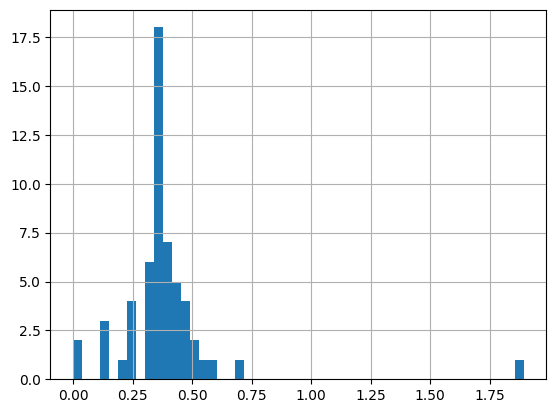

In [68]:

Ccu.hist(bins=50)